Note: This file was used to prototype the math for the homography estimation. Feel free to explore the notebook but there won't be any documentation

In [133]:
import numpy as np
import matplotlib.pyplot as plt


class Point:

    def __init__(self,x,y):
        self.x = x
        self.y = y

# projectinion points a -> b
#a1 = np.array(0,0)
#a2 = np.array(1,4)
#a3 = np.array(2,4)
#a4 = np.array(3,0)

#b1 = np.array(0,0)
#b2 = np.array(0,3)
#b3 = np.array(3,3)
#b4 = np.array(3,0)

a1 = Point(0,0)
a2 = Point(1,4)
a3 = Point(2,4)
a4 = Point(3,0)

b1 = Point(0,0)
b2 = Point(0,3)
b3 = Point(3,3)
b4 = Point(3,0)

## Strat 1: not using

In [47]:
P = np.mat([[-a1.x,-a1.y,-1,0,0,0, a1.x*b1.x, a1.y*b1.x, b1.x],
            [0,0,0,-a1.x,-a1.y,-1, a1.x*b1.y, a1.y*b1.y, b1.y],
            [-a2.x,-a2.y,-1,0,0,0, a2.x*b2.x, a2.y*b2.x, b2.x],
            [0,0,0,-a2.x,-a2.y,-1, a2.x*b2.y, a2.y*b2.y, b2.y],
            [-a3.x,-a3.y,-1,0,0,0, a3.x*b3.x, a3.y*b3.x, b3.x],
            [0,0,0,-a3.x,-a3.y,-1, a3.x*b3.y, a3.y*b3.y, b3.y],
            [-a4.x,-a4.y,-1,0,0,0, a4.x*b4.x, a4.y*b4.x, b4.x],
            [0,0,0,-a4.x,-a4.y,-1, a4.x*b4.y, a4.y*b4.y, b4.y]
            ])
print(P)

[[ 0  0 -1  0  0  0  0  0  0]
 [ 0  0  0  0  0 -1  0  0  0]
 [-1 -4 -1  0  0  0  0  0  0]
 [ 0  0  0 -1 -4 -1  3 12  3]
 [-2 -4 -1  0  0  0  6 12  3]
 [ 0  0  0 -2 -4 -1  6 12  3]
 [-3  0 -1  0  0  0  9  0  3]
 [ 0  0  0 -3  0 -1  0  0  0]]


[[0.]]
[[0.6815542]]
[[1]]
[[4]]


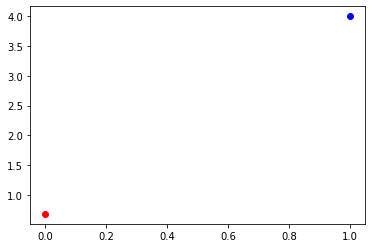

In [58]:

svd = np.linalg.svd(P)

v = np.reshape(svd[2][-1],(3,3))

x = np.mat([1,4,1]).reshape((3,1))


result = np.matmul(v,x)

#P = np.matmul(np.transpose(P),P)
#eig_vals = np.linalg.eig(P)
#print(P)
#last_eig = eig_vals[1][-1]
#last_eig = np.reshape(last_eig,(3,3))

# = np.mat([1,4,1]).reshape((3,1))

#result = np.matmul(last_eig,x)

print(result[0])
print(result[1])

print(x[0])
print(x[1])


fig = plt.figure()

plt.plot(result[0],result[1],'ro') 
plt.plot(x[0],x[1],'bo') 


plt.show()



In [ ]:
import matplotlib.pyplot as plt


## Strat 2: Using

In [134]:
# trying somethine else
P = np.mat([[-a1.x,-a1.y,-1,0,0,0, a1.x*b1.x, a1.y*b1.x, b1.x],
            [0,0,0,-a1.x,-a1.y,-1, a1.x*b1.y, a1.y*b1.y, b1.y],
            [-a2.x,-a2.y,-1,0,0,0, a2.x*b2.x, a2.y*b2.x, b2.x],
            [0,0,0,-a2.x,-a2.y,-1, a2.x*b2.y, a2.y*b2.y, b2.y],
            [-a3.x,-a3.y,-1,0,0,0, a3.x*b3.x, a3.y*b3.x, b3.x],
            [0,0,0,-a3.x,-a3.y,-1, a3.x*b3.y, a3.y*b3.y, b3.y],
            [-a4.x,-a4.y,-1,0,0,0, a4.x*b4.x, a4.y*b4.x, b4.x],
            [0,0,0,-a4.x,-a4.y,-1, a4.x*b4.y, a4.y*b4.y, b4.y],
            [0,0,0,0,0,0,0,0,1]
            ])

b = np.array([0,0,0,0,0,0,0,0,1])

print(P)

[[ 0  0 -1  0  0  0  0  0  0]
 [ 0  0  0  0  0 -1  0  0  0]
 [-1 -4 -1  0  0  0  0  0  0]
 [ 0  0  0 -1 -4 -1  3 12  3]
 [-2 -4 -1  0  0  0  6 12  3]
 [ 0  0  0 -2 -4 -1  6 12  3]
 [-3  0 -1  0  0  0  9  0  3]
 [ 0  0  0 -3  0 -1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1]]


In [138]:
# assume A = P
# (A^T * A)^-1
C = np.linalg.inv(np.matmul(np.transpose(P),P))
# (A^T * A)^-1 * A^T
C = np.matmul(C,np.transpose(P))
H = np.matmul(C,b)

H = np.reshape(H,(3,3))

x = np.mat([2,4,1]).reshape((3,1))

print(H.shape,x.shape)

result = np.matmul(H,x)

result = result/result[2]


print(result)
print(H)



(3, 3) (3, 1)
[[3.]
 [3.]
 [1.]]
[[ 1.00000000e+00 -2.50000000e-01  1.52259158e-15]
 [ 7.61295788e-16  2.50000000e-01 -1.26439903e-15]
 [ 8.68075616e-17 -1.66666667e-01  1.00000000e+00]]


# Strat 4

In [121]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread(os.path.expanduser( "./card.jpg"), 0)
if img is None:
    print("Check file path")
cv2.imshow("HYPE IMAGE", img)
cv.waitKey(0)
cv.destroyAllWindows()

Check file path


error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/highgui/src/window.cpp:1000: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [127]:
import cv2

# path
path = 'john.png'

# Using cv2.imread() method
img = cv2.imread(path)




# Displaying the image
img.shape

(1080, 1920, 3)

# Testing

In [130]:
import cv2
from homography_estimation import Transform, Point

t = Transform()

path = "./qr_code.png"


t.load_image(path)

# create transform point

t.add_points([Point(92,107), Point(120,81), Point(163,102), Point(137,136)], [Point(0,0), Point(0,100), Point(100,100), Point(0,100)])

#t.transform_image()

#t.display_transform()
#t.display_image()

H:  [[-4.41994476e-14  4.82931304e-15  4.61573003e-12]
 [-6.20578379e-02 -8.81221298e-01  1.00000000e+02]
 [-6.20578379e-04 -8.81221298e-03  1.00000000e+00]]


In [141]:
a1 = Point(0,0)
a2 = Point(1,4)
a3 = Point(2,4)
a4 = Point(3,0)

b1 = Point(0,0)
b2 = Point(0,3)
b3 = Point(3,3)
b4 = Point(3,0)

t.add_points([Point(0,0), Point(1,4), Point(2,4), Point(3,0)], [Point(0,0), Point(0,3), Point(3,3), Point(3,0)])

H:  [[ 1.00000000e+00 -2.50000000e-01  1.52259158e-15]
 [ 7.61295788e-16  2.50000000e-01 -1.26439903e-15]
 [ 8.68075616e-17 -1.66666667e-01  1.00000000e+00]]
